# Customer Churn Analysis Project

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_churn = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In our dataset, there are 7043 rows and 21 columns present. There are numerical data columns as well as object type data columns that we will convert to numerical format before training our model. Since we are supposed to predict the customer churn which is a categorical data type, so it makes this a Classification problem.

## Shape of data with number of rows and columns


In [3]:
df_churn.shape

(7043, 21)

There are 7043 rows and 21 columns in dataset

In [4]:
#checking column names
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#checking the datatype information
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the above cell, we can see that there is a dataset having 1 float datatype column, 2 integer datatype columns and 18 object datatype columns present in our dataset.

## Statistical Analysis

In [6]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here, we can see the statistical details of the given dataset.

## Datatypes of all columns

In [7]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Monthlycharges column is having float datatype, SeniorCitizen and tenure columns are having integer datatype and rest of the columns are having object datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

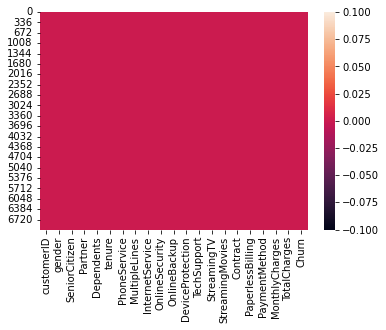

In [9]:
#To check missing values using heatmap
sns.heatmap(df_churn.isnull())

In the above cell, we can see that there are no any missing values present in our dataset.

In [10]:
#checking unique values
df_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In the above cell, we can see the number of unique values each columns contains.

## Data Pre-processing

In [11]:
#dropping column 'customerID' as it is not providing much insight about our label prediction
df_churn.drop("customerID", axis=1, inplace=True)

In [12]:
#converting the column to numeric data
df_churn['TotalCharges']=pd.to_numeric(df_churn['TotalCharges'],errors='coerce',downcast='float')

In [13]:
#getting the list of float data type column names
num_data = []
for x in df_churn.dtypes.index:
    if df_churn.dtypes[x] == 'float64' or df_churn.dtypes[x] == 'int64' or df_churn.dtypes[x] == 'float32':
        num_data.append(x)
print(f"Continuous Columns:\n", num_data)

#getting list of object data type column names
obj_data = []
for x in df_churn.dtypes.index:
    if df_churn.dtypes[x] == 'object':
        obj_data.append(x)
print(f"Categorical Columns:\n", obj_data)

Continuous Columns:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

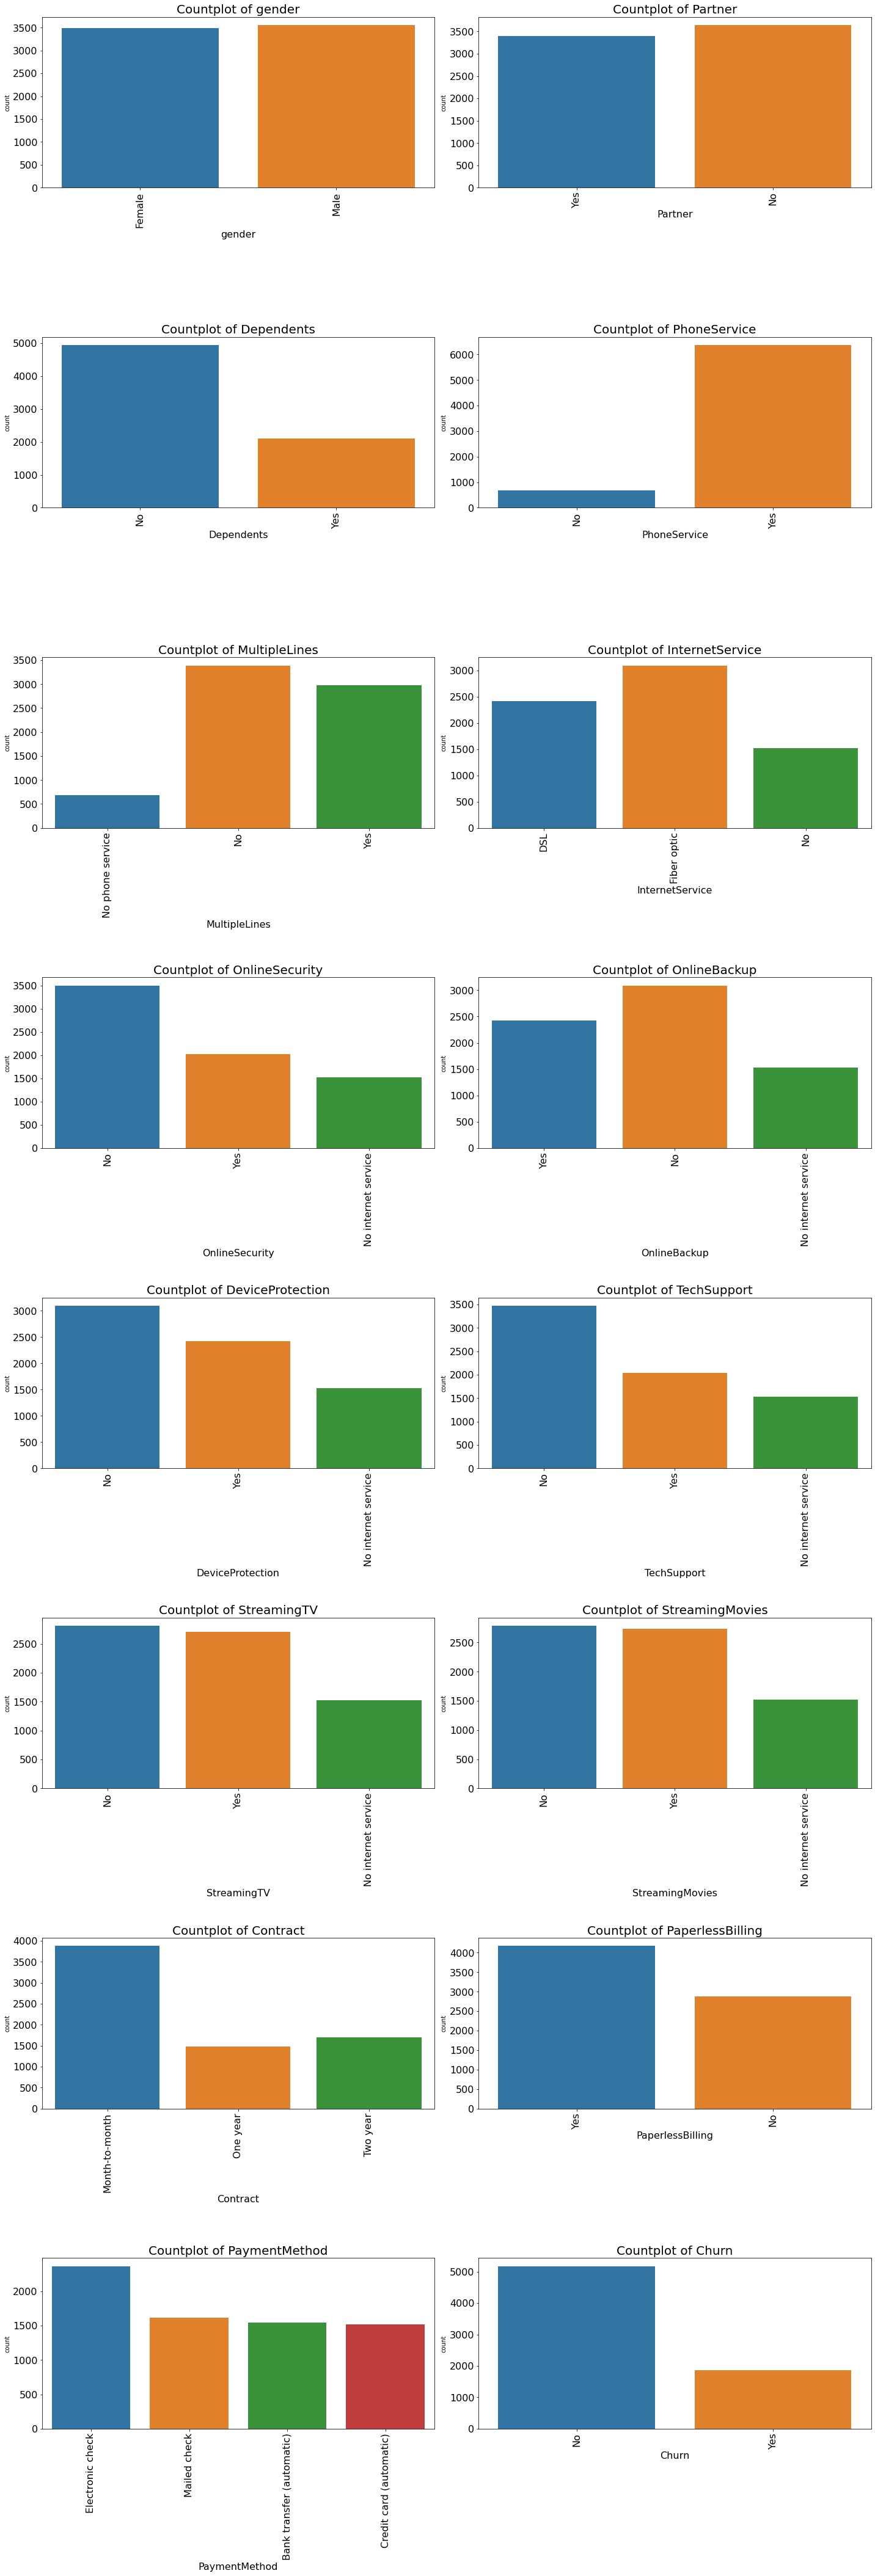

In [14]:
#checking countplot for the feature columns
plt.figure(figsize=(20,70))
for i in range(len(obj_data)):
    plt.subplot(10,2,i+1)
    sns.countplot(df_churn[obj_data[i]])
    plt.title(f"Countplot of {obj_data[i]}",fontsize=20)
    plt.xlabel(obj_data[i],fontsize=16)
    plt.xticks(rotation=90,fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()

- From gender plot, we see that the male count is more as compared to female.
- From Partner plot, we see that customers having partner count is less than those without partners.
- From Dependents plot, we can see that Dependents has high no count than yes count.
- From phoneservice plot, we can see that NO has less count and YES has high count.
- From multipleline plot, we can see that No has the highest count while no phone service has the least count.
- From internet service plot, we can see that the count of fiber optic is highest while No has the least count.
- From onlinesecurity plot, we can see that No has high count while no internet service has the less count.
- From onlinebackup plot, we can see that No has the highest count folowed by Yes while No internet service has the least count.
- From device protection plot, we can see that No has the highest count while No internet service has the least count.
- From techsupport plot, we can see that No count is high while no internet service has the least count.
- From streamingtv plot and streaming movies plot, we can see No has the highest count and no internet service has the least count.
- From contract plot, we can see month to month contract is more popular among the customers while one year contract is the least popular one.
- From PaperlessBilling plot, we can see that Yes has more count indicating people use to take paperless billing more.
- From paymentmethod plot, we can see that Electronic check count is high indicating that people use electric-check method more as compared to to others.
- From Churn plot, we can see that No has the highest count indicating that most of the people are not interested while yes has the lowest count.

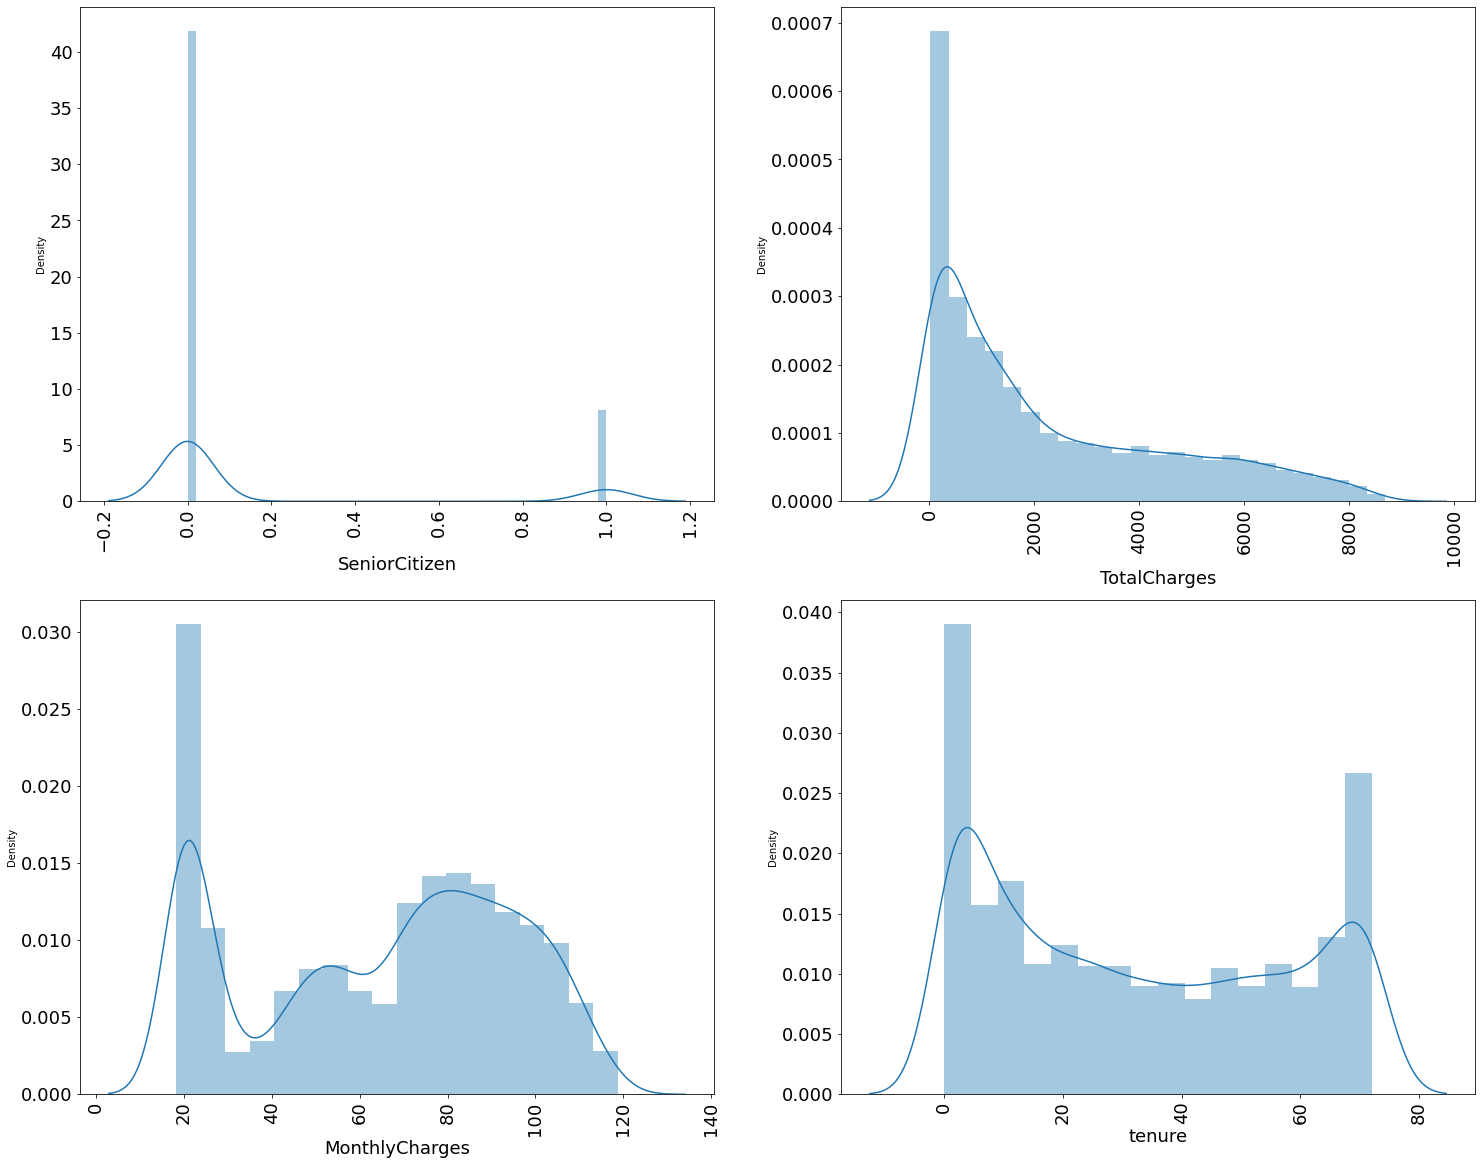

In [15]:
#checking distribution plots for continuous columns
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.distplot(df_churn['SeniorCitizen'])
plt.xlabel('SeniorCitizen',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)
plt.subplot(2,2,2)
sns.distplot(df_churn['TotalCharges'])
plt.xlabel('TotalCharges',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)
plt.subplot(2,2,3)
sns.distplot(df_churn['MonthlyCharges'])
plt.xlabel('MonthlyCharges',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)
plt.subplot(2,2,4)
sns.distplot(df_churn['tenure'])
plt.xlabel('tenure',fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

- From Senior Citizen plot, we can see that-
1. Either customers are younger customer or senior citizen customer.
2. The total number of younger customer is more than the total number of senior citizen customer.
- From Total Charges plot, we can see that-
1. Data is positively skewed
2. Customer have spent upto 8,000
3. Majority of the population spent approx 1,100
- From MonthlyCharges plot, we can see that-
1. Data is not normally distributed.
2. Maximum amount people spent was 24 as they were subscribed to basic package.
3. Between 70-100 dollar, there was a large number of customers.
- From tenure plot, we can see that-
1. It is Bi-Model distribution having 2 peak which means data is concentrated across two different group.
2. We have a major chunk of customers in 0-5 month period might be because lot of customers tried the service and left or liked the service and continued.
3. Between 10-65 months, we see a flat distribution of data.
4. There were lot of customers in 69-72 months range. They were the royal customers.

### Bivariate Analysis

Bivariate Analysis works with two variables.

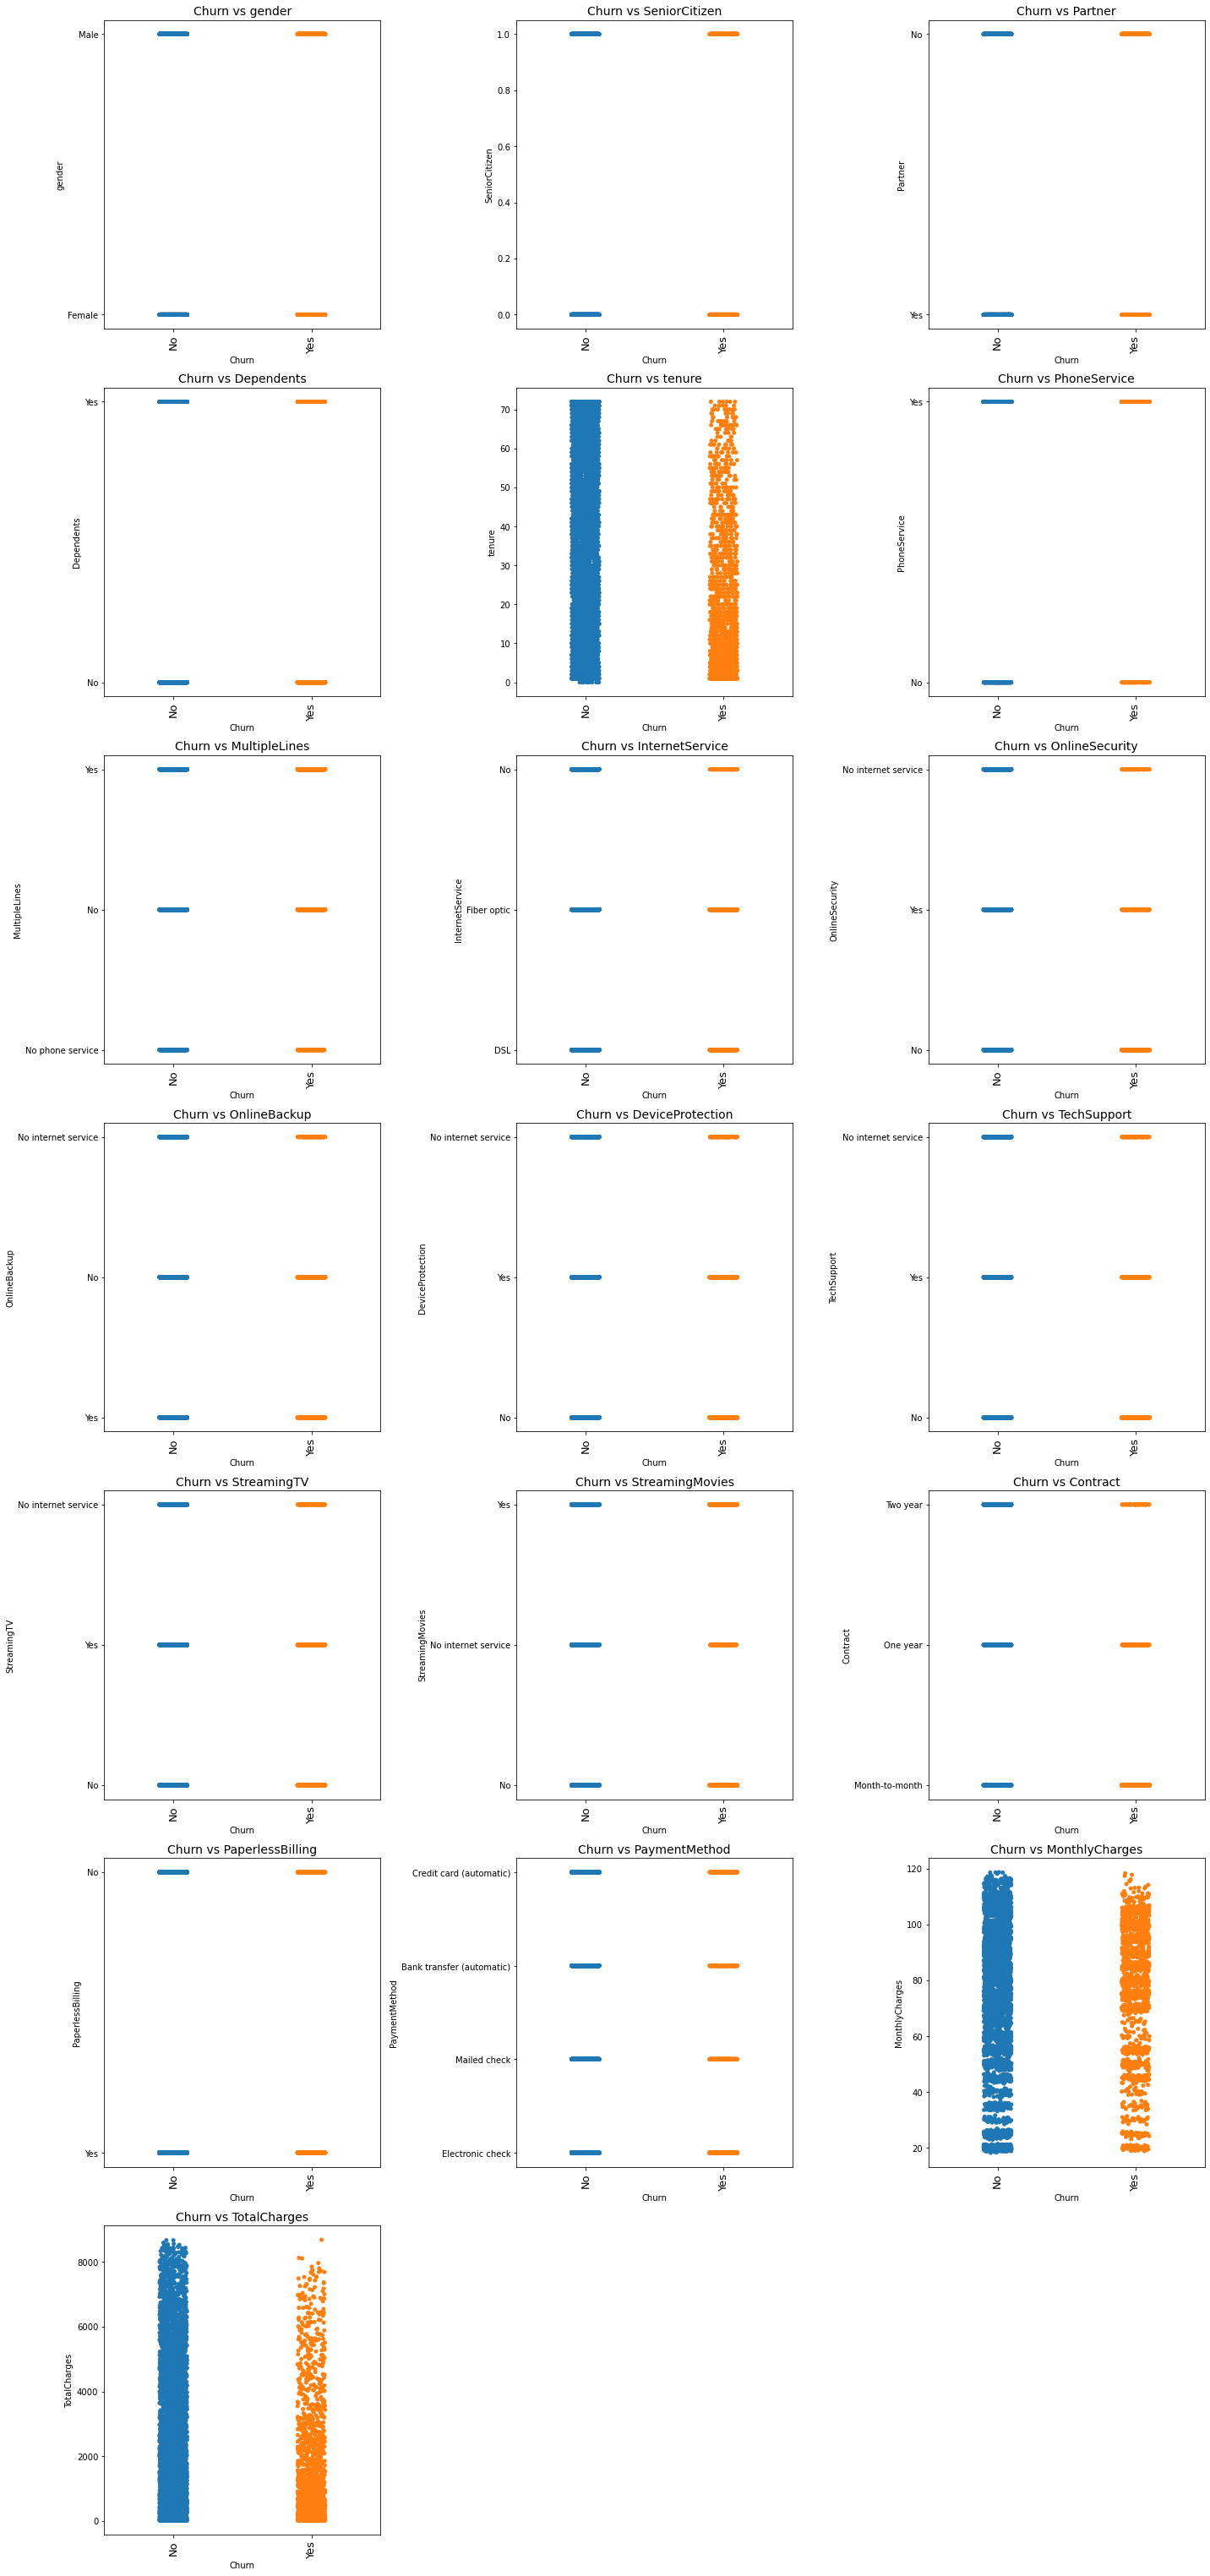

In [16]:
#checking stripplot for churn vs feature columns.
df_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20,60))
for i in range(len(df_features)):
    plt.subplot(10,3,i+1)
    sns.stripplot(x=df_churn['Churn'],y=df_churn[df_features[i]])
    plt.title(f"Churn vs {df_features[i]}",fontsize=14)
    plt.xticks(rotation=90,fontsize=13)
    plt.tight_layout()

- From tenure plot, we can see that No has high values and yes has less values which indicates that tenure is effecting the churn.
- From monthlycharges plot, we can see that No has more values and high rate whereas yes has less values indicating that churn is getting affected by monthly charges.
- From Totalcharges plot, we can say no has high values than Yes.

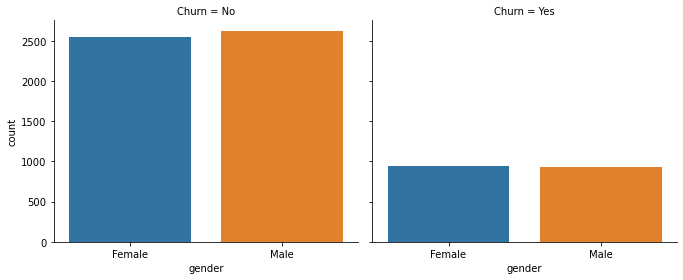

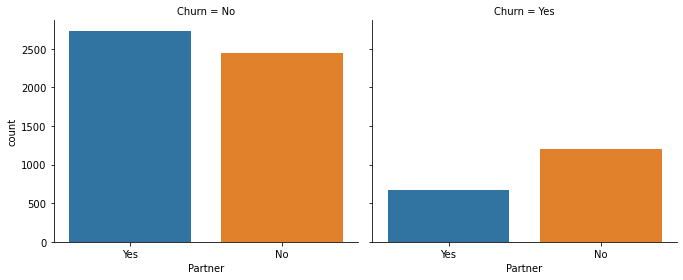

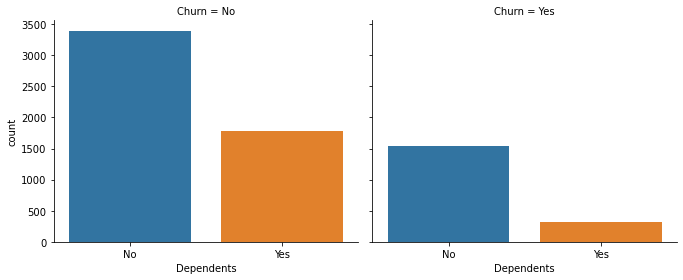

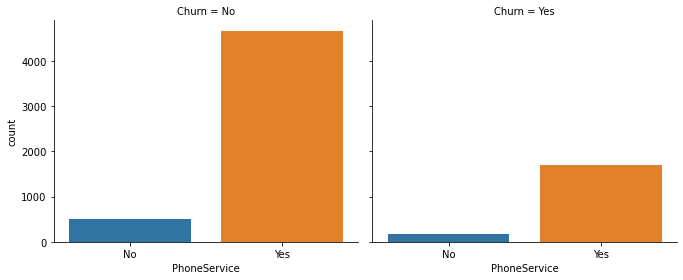

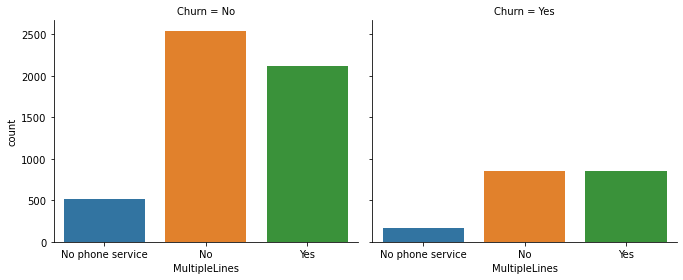

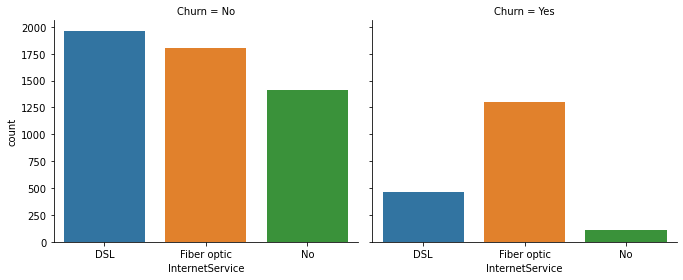

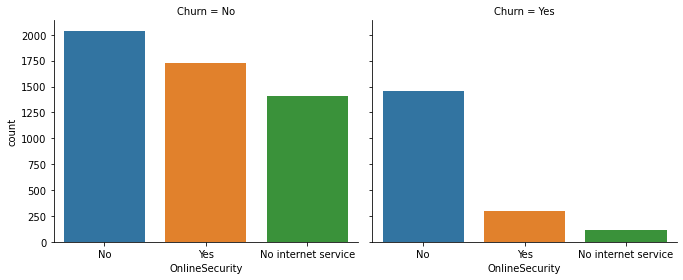

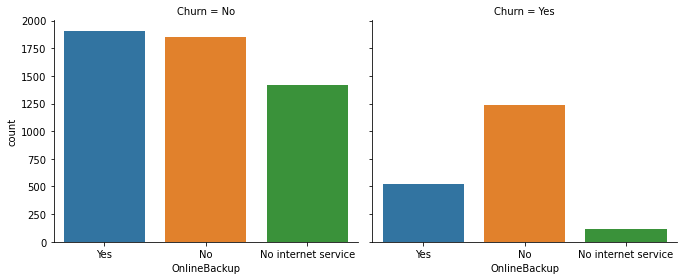

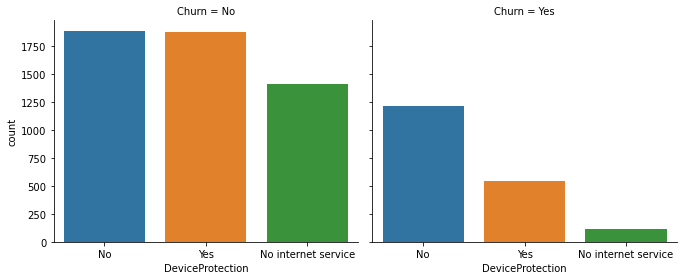

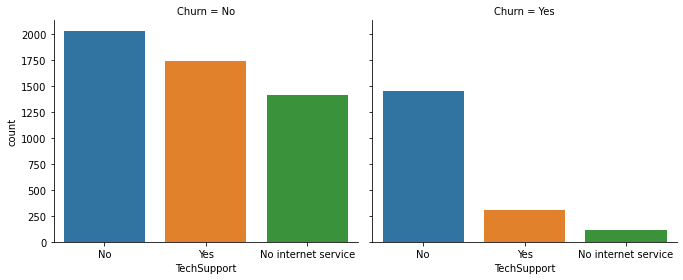

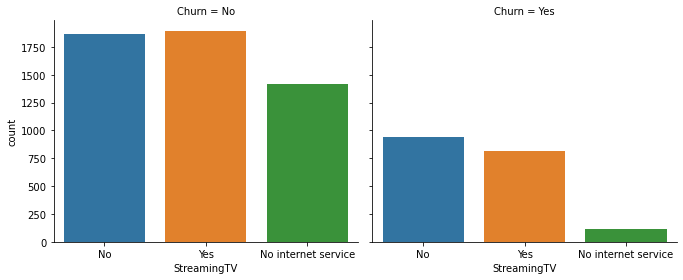

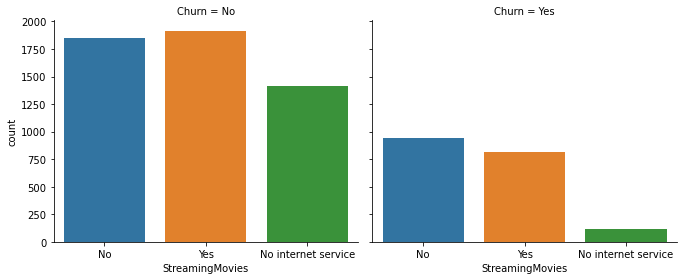

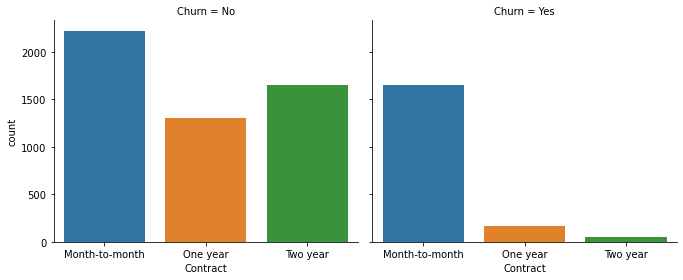

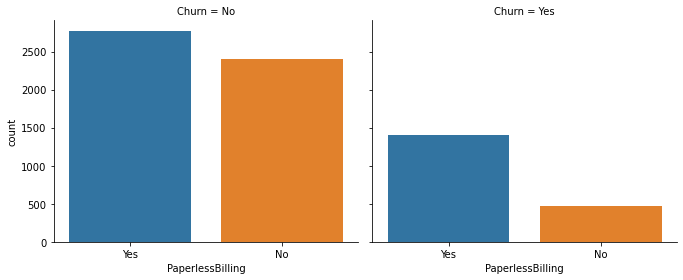

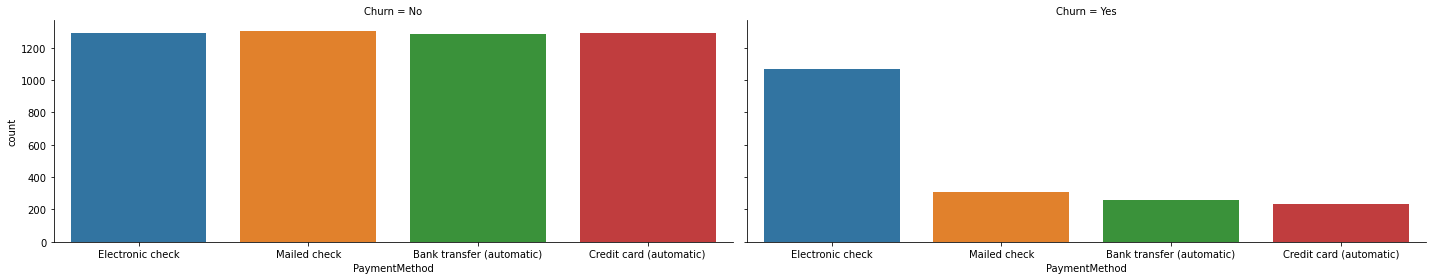

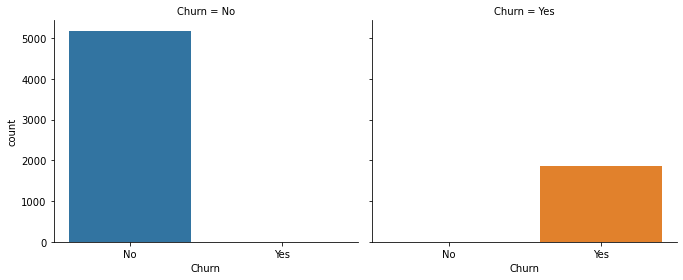

In [17]:
#Checking catplot for churn w.r.t the categorical columns
for col in obj_data:
    if col=='PaymentMethod':
        aspect_ratio=2.5
    else:
        aspect_ratio=1.2
    plot=sns.catplot(x=col,col='Churn',data=df_churn,kind='count',height=4,aspect=aspect_ratio)

1. From gender plot, we see that Churn has almost equal value for both the gender.
2. Customers with partner have less chance of leaving as seen from the partner plot. 
3. Customer with no dependents have high chance of leaving as seen from the dependents plot.
4. From PhoneService plot, we see that Yes has high chance to churn.
5. From multiplelines plot. we can see that no phone service has less chance to churn while No and Yes has same chance to churn.
6. rom internet service plot, we can see that people with fiber optic has higher chance of leaving.
7. People with No OnlineSecurity has high chance of leaving and people with No internet service has less chance of leaving.
8. Customers with Online backup who dont have backup have high chance to churn and those who do not have internet service have very less chance to churn.
9. From device protection plot, we can see that those who don't have deviceprotection have higher chance to churn while those who have no internet service have less chance to churn.
10. People who dont have techsupport have high chance and who don't have no internet service have less chance to churn which is the case for streamingTV and streamingMovies too.
11. People having contract month-to-month have high chance to churn while people who have two year of contract have less chance to churn.
12. People who use PaperlessBilling have high chance to leave and who dont use paperbilling have less chance of leaving.
13. People who use electroniccheck as a paymentmethod have high chance of leaving and rest of all have have less chance of leaving

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

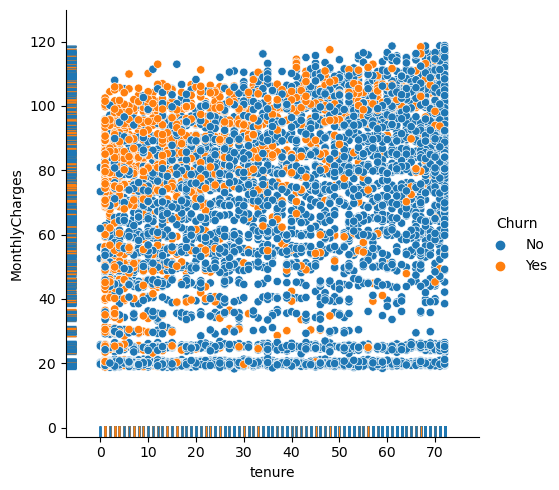

In [18]:
#Checking the relation of churn w.r.t tenure and monthlycharges
plt.style.use('default')
sns.relplot(data=df_churn, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df_churn, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

From the above plot, we see that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retention on those phase is required.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

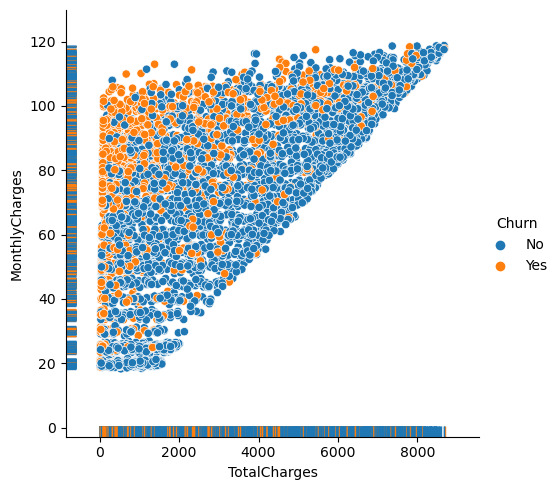

In [19]:
#checking relation of churn w.r.t Toatalcharges and Monthlycharges
sns.relplot(data=df_churn, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df_churn, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

From the above plot, we see that people with high monthly charges tend to leave the service. However, when a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase in monthly charges with total charges.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

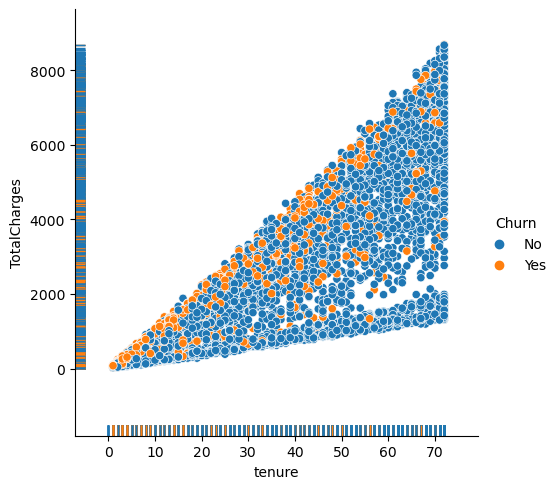

In [20]:
#checking churn w.r.t tenure and totalcharges
sns.relplot(data=df_churn, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df_churn, x='tenure', y='TotalCharges', hue='Churn', legend=False)

From the above plot, we can see that shows as the tenure increases the total charges increases as well and if people have chosen a high tenure to use the service then the churn criteria is low or negligible.

In [21]:
#checking the number of unique values categorical features have
df_churn[obj_data].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

Here we are checking all the categorical columns to see how many unique values they have so that we can encode them.

## Encoding the feature data:

In [22]:
#Using ordinal encoder to encode the categorical columns
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df_churn.columns:
    if df_churn[i].dtypes == "object":
        df_churn[i] = oe.fit_transform(df_churn[i].values.reshape(-1,1))

In [23]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.850000,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.500000,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.150002,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.750000,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.649994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.500000,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.899902,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.450012,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.600006,1.0


## Feature Engineering:

In [24]:
#sorting tenurerange values into bins
df_churn['TenureRange']=pd.cut(df_churn['tenure'],5)
#combining the data
df_churn[['TenureRange','Churn']].groupby(['TenureRange'],as_index=False).mean().sort_values(by='TenureRange',ascending=True)

#specifying rows and columns by their integer position values
df_churn.loc[ df_churn['tenure']<=8, 'TenureCat']=0
df_churn.loc[(df_churn['tenure']>8) & (df_churn['tenure']<=15),'TenureCat']=1
df_churn.loc[(df_churn['tenure']>15) & (df_churn['tenure']<=30),'TenureCat']=2
df_churn.loc[(df_churn['tenure']>30) & (df_churn['tenure']<=45),'TenureCat']=3
df_churn.loc[(df_churn['tenure']>45) & (df_churn['tenure']<=60),'TenureCat']=4
df_churn.loc[df_churn['tenure']>60 ,'TenureCat']=5
#checking the columns
df_churn[['tenure','TenureRange','TenureCat']].head(10)

,tenure,TenureRange,TenureCat
0,1,"(-0.072, 14.4]",0.0
1,34,"(28.8, 43.2]",3.0
2,2,"(-0.072, 14.4]",0.0
3,45,"(43.2, 57.6]",3.0
4,2,"(-0.072, 14.4]",0.0
5,8,"(-0.072, 14.4]",0.0
6,22,"(14.4, 28.8]",2.0
7,10,"(-0.072, 14.4]",1.0
8,28,"(14.4, 28.8]",2.0
9,62,"(57.6, 72.0]",5.0


In [25]:
df_churn['MonthlyChargesRange']=pd.cut(df_churn['MonthlyCharges'],5)
df_churn[['MonthlyChargesRange','Churn']].groupby(['MonthlyChargesRange'],as_index=False).mean().sort_values(by='MonthlyChargesRange',ascending=True)

df_churn.loc[df_churn['MonthlyCharges']<=20,'MonthlyChargeCat']=0
df_churn.loc[(df_churn['MonthlyCharges']>20) & (df_churn['MonthlyCharges']<=40),'MonthlyChargeCat']=1
df_churn.loc[(df_churn['MonthlyCharges']>40) & (df_churn['MonthlyCharges']<=60),'MonthlyChargeCat']=2
df_churn.loc[(df_churn['MonthlyCharges']>60) & (df_churn['MonthlyCharges']<=80),'MonthlyChargeCat']=3
df_churn.loc[(df_churn['MonthlyCharges']>80) & (df_churn['MonthlyCharges']<=100),'MonthlyChargeCat']=4
df_churn.loc[df_churn['MonthlyCharges']>100,'MonthlyChargeCat']=5

df_churn[['MonthlyCharges','MonthlyChargesRange','MonthlyChargeCat']].head(10)

,MonthlyCharges,MonthlyChargesRange,MonthlyChargeCat
0,29.85,"(18.15, 38.35]",1.0
1,56.95,"(38.35, 58.45]",2.0
2,53.85,"(38.35, 58.45]",2.0
3,42.30,"(38.35, 58.45]",2.0
4,70.70,"(58.45, 78.55]",3.0
5,99.65,"(98.65, 118.75]",4.0
6,89.10,"(78.55, 98.65]",4.0
7,29.75,"(18.15, 38.35]",1.0
8,104.80,"(98.65, 118.75]",5.0
9,56.15,"(38.35, 58.45]",2.0


In [26]:
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureRange,TenureCat,MonthlyChargesRange,MonthlyChargeCat
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,...,0.0,1.0,2.0,29.85,29.850000,0.0,"(-0.072, 14.4]",0.0,"(18.15, 38.35]",1.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,...,1.0,0.0,3.0,56.95,1889.500000,0.0,"(28.8, 43.2]",3.0,"(38.35, 58.45]",2.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,...,0.0,1.0,3.0,53.85,108.150002,1.0,"(-0.072, 14.4]",0.0,"(38.35, 58.45]",2.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,42.30,1840.750000,0.0,"(43.2, 57.6]",3.0,"(38.35, 58.45]",2.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2.0,70.70,151.649994,1.0,"(-0.072, 14.4]",0.0,"(58.45, 78.55]",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,...,1.0,1.0,3.0,84.80,1990.500000,0.0,"(14.4, 28.8]",2.0,"(78.55, 98.65]",4.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,...,1.0,1.0,1.0,103.20,7362.899902,0.0,"(57.6, 72.0]",5.0,"(98.65, 118.75]",5.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,...,0.0,1.0,2.0,29.60,346.450012,0.0,"(-0.072, 14.4]",1.0,"(18.15, 38.35]",1.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,3.0,74.40,306.600006,1.0,"(-0.072, 14.4]",0.0,"(58.45, 78.55]",3.0


In [27]:
#dropping these columns since they are useless for our model prediction
df_churn.drop(['MonthlyChargesRange','TenureRange'],axis=1,inplace=True)

In [28]:
df_churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureCat            0
MonthlyChargeCat     0
dtype: int64

In [29]:
#filling the null values in the TotalCharges column with its mean
df_churn["TotalCharges"]=df_churn["TotalCharges"].fillna(np.mean(df_churn["TotalCharges"]))

## Multivariate Analysis:

In [30]:
#Checking Correlation
df_churn.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCat,MonthlyChargeCat
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,...,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612,0.007364,-0.013915
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,...,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889,0.016362,0.214525
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,...,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448,0.373229,0.097663
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,...,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221,0.160359,-0.108931
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,...,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229,0.984239,0.250510
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,...,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942,0.010180,0.239367
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,...,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037,0.340048,0.440355
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,...,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291,-0.025428,-0.315187
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,...,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309,0.316500,-0.055205
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,...,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525,0.360535,0.117423


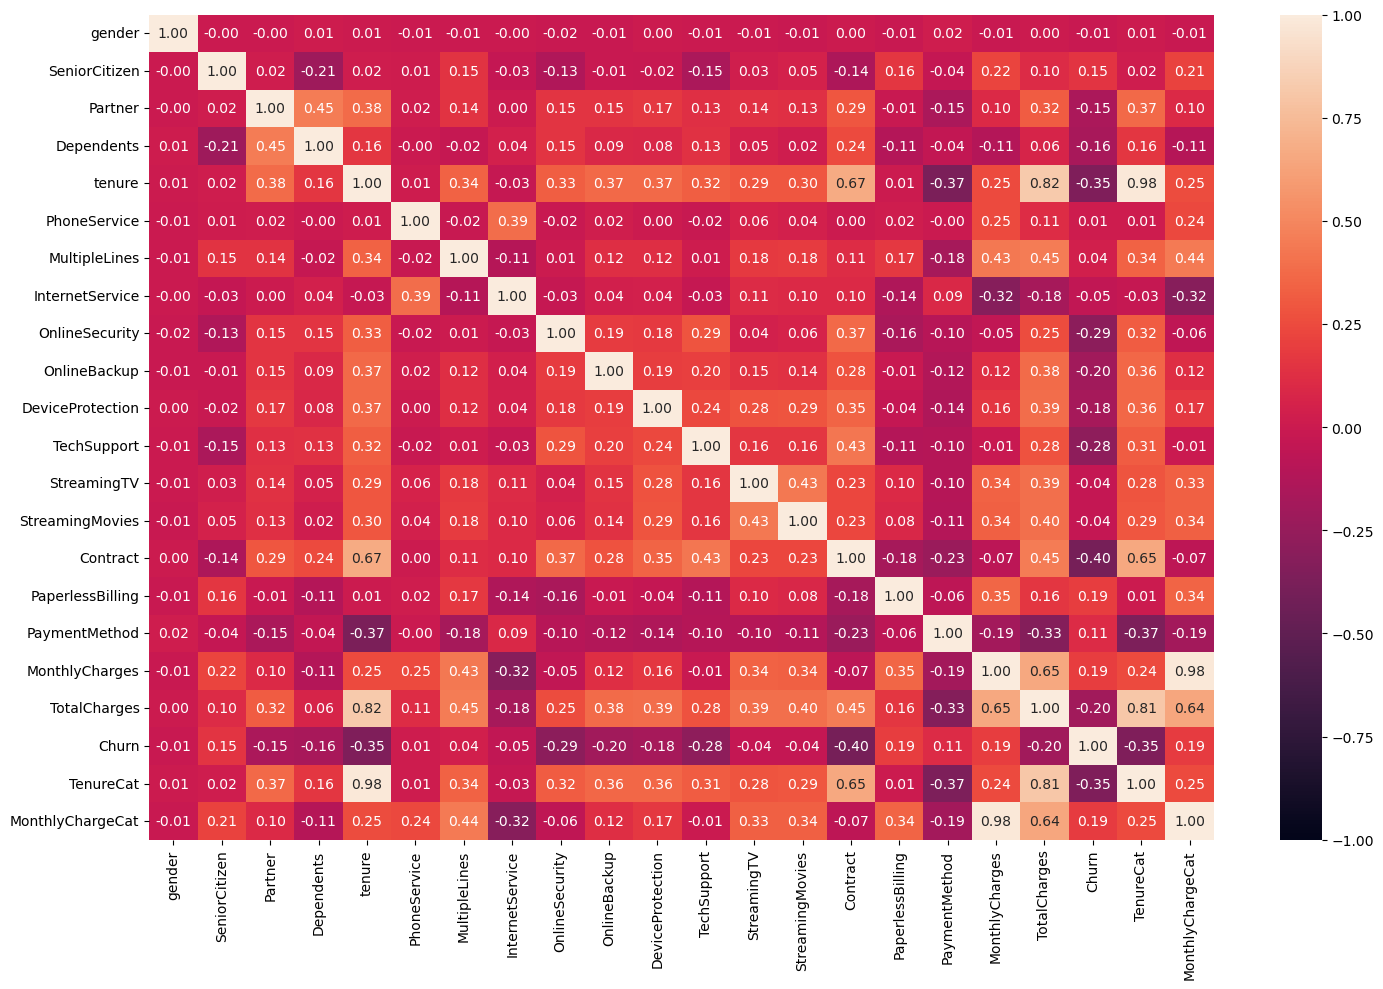

In [31]:
df_correlation = df_churn.corr()

plt.figure(figsize = (15,10))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True, fmt='.2f')
plt.tight_layout()

In the above heatmap, we can see the correlation details plus we can also determine that there is no multicollinearity issue between our columns.

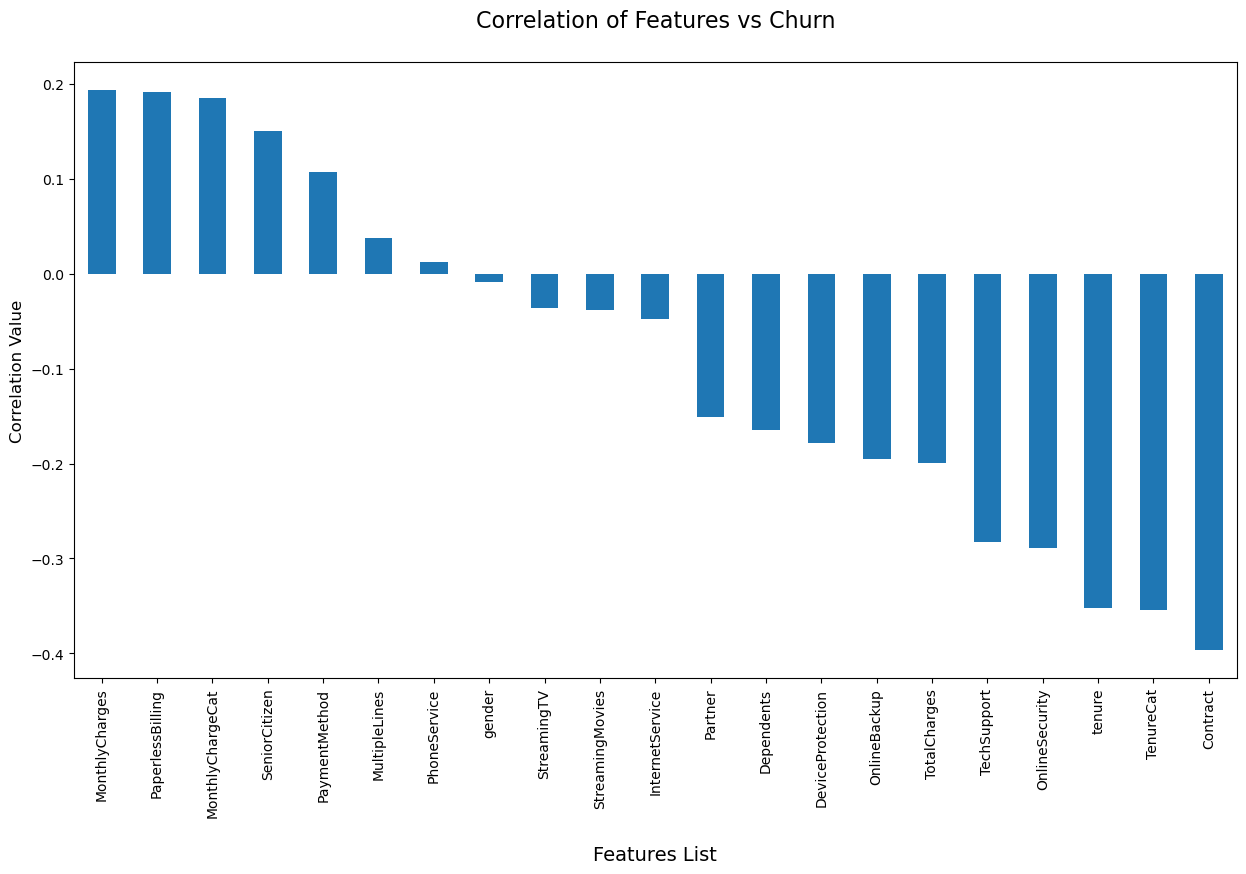

In [32]:
#checking correlation of feature columns with target label using barplot
df_correlation = df_churn.corr()
plt.figure(figsize=(15,8))
df_correlation['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Churn\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Here, we have generated this barplot to have a clear vision of positive and negative correlated column feature columns w.r.t our target label and we can see that columns like monthlycharges, paperlessbilling, seniorcitizen, paymentmethod, multiplelines and phoneservice are positively correlated with our target label churn while all the remaining features are negatively correlated.

## Preparation for model building

In [33]:
x=df_churn.drop('Churn',axis=1)
y=df_churn['Churn']

## Checking outliers using boxplot:

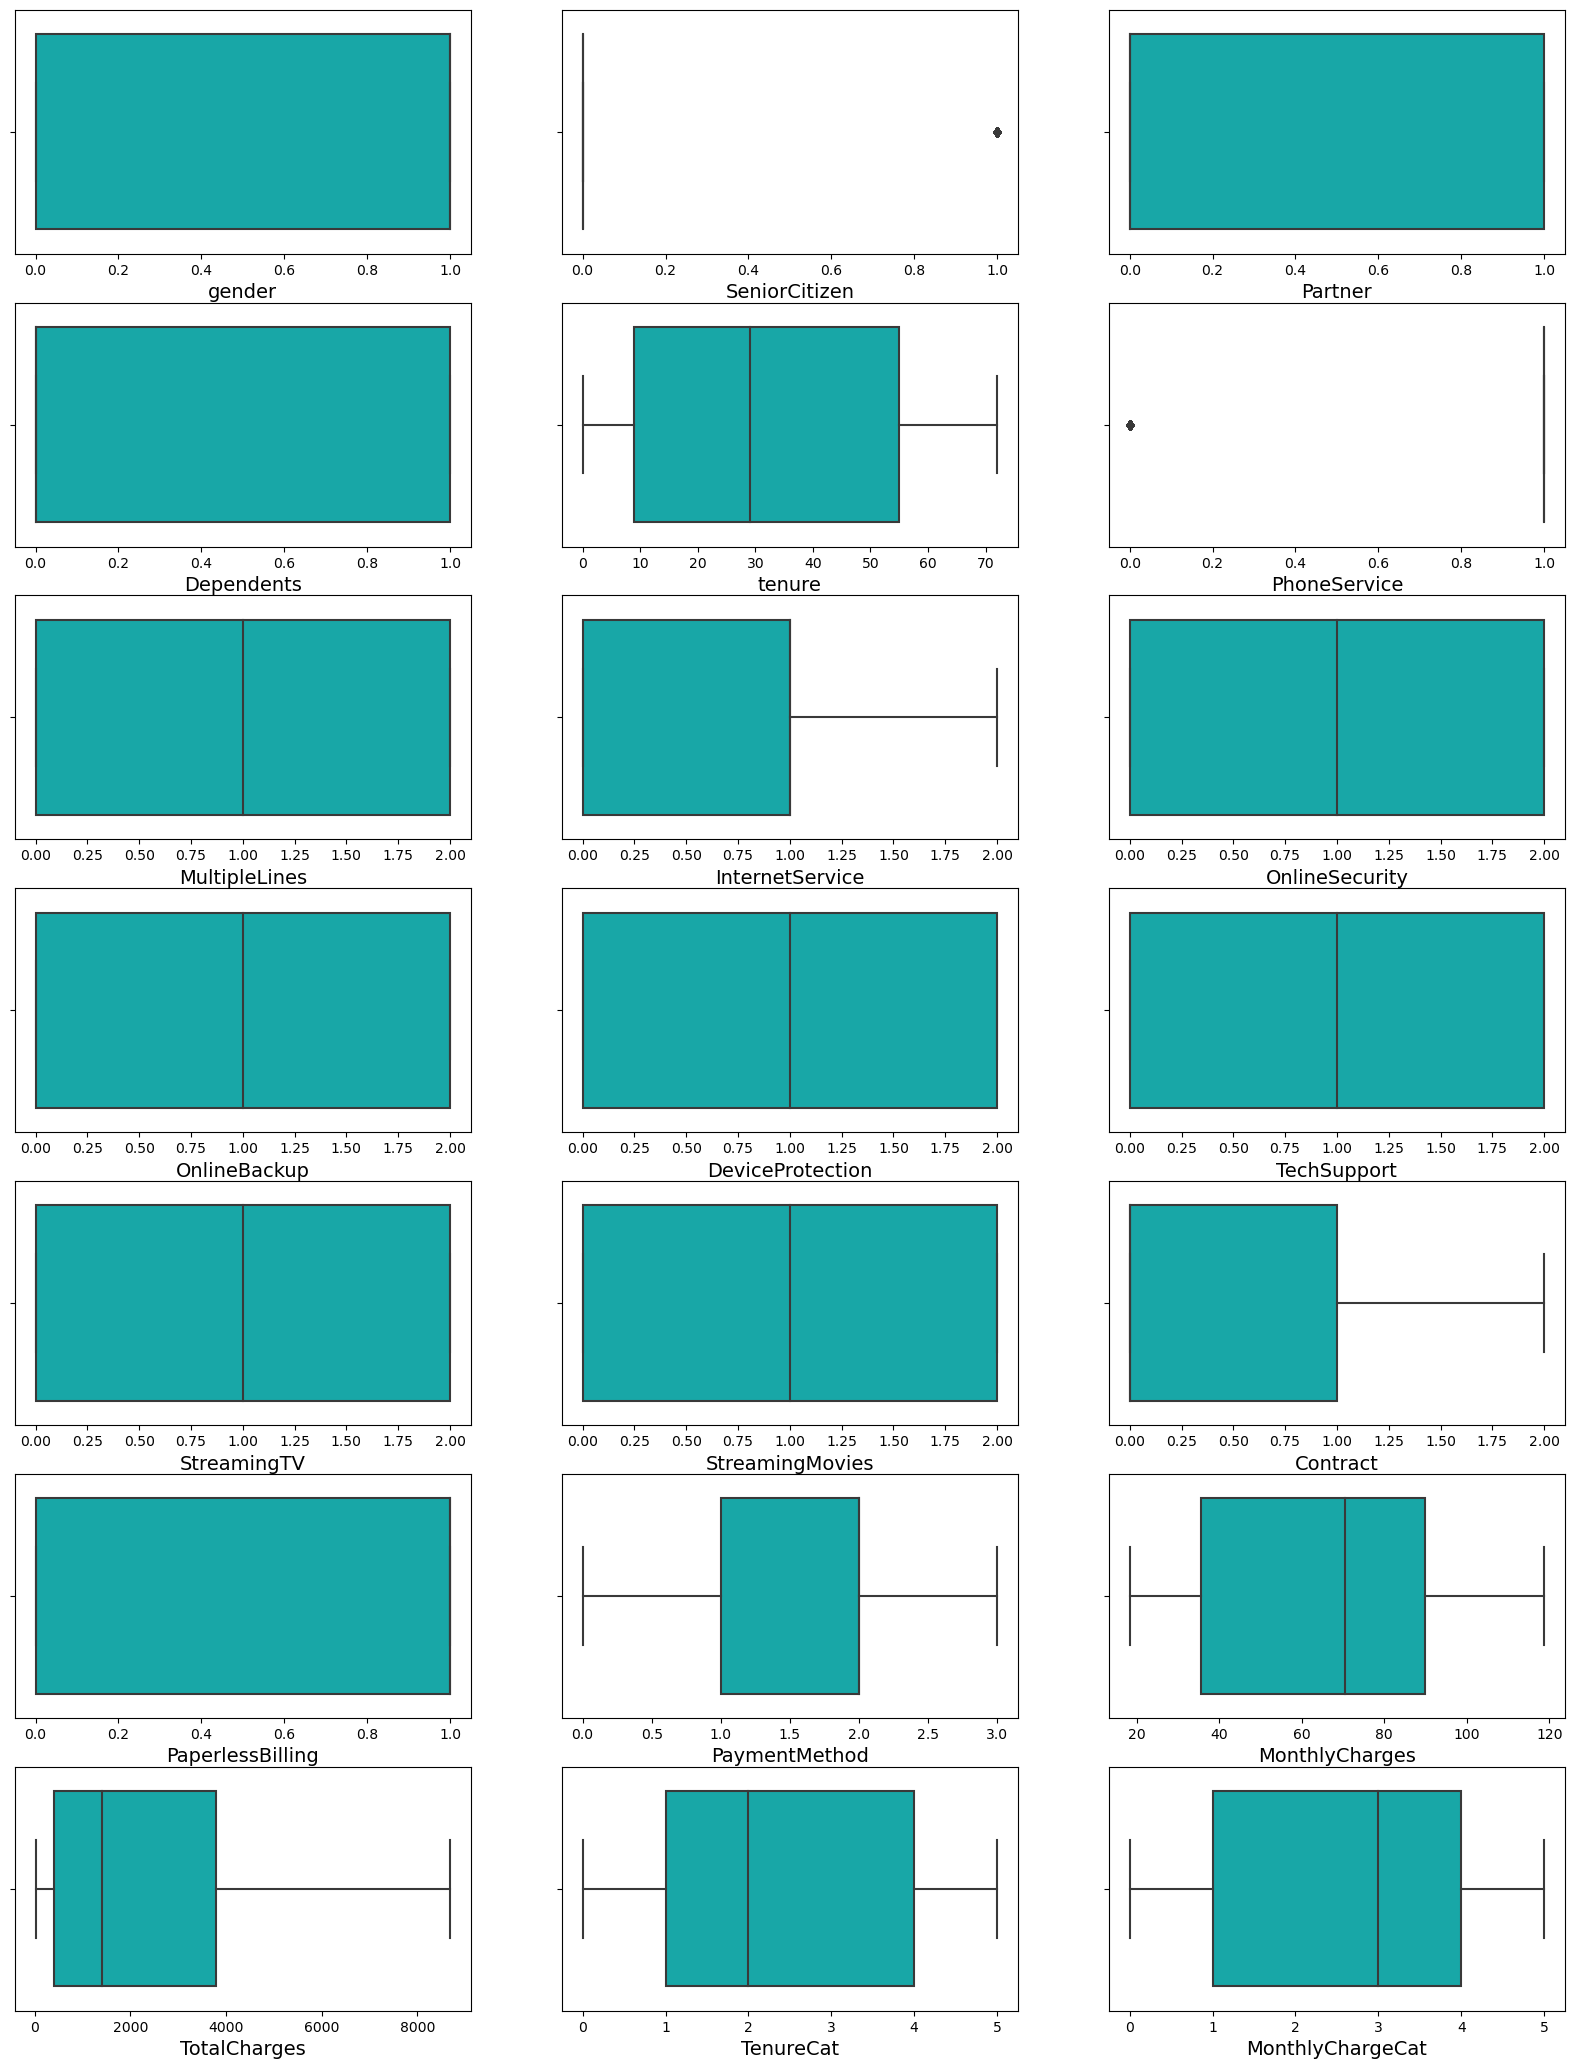

In [34]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in x:
    if plot_number <= 24: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

From the above boxplots, we see that there are no outliers present in our dataset.

## Resolving the class imbalance issue in the target column using SMOTE method:

Our dataset contains imbalanced data so we are going to use SMOTE technique to balance the imbalnced data.

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Churn'])

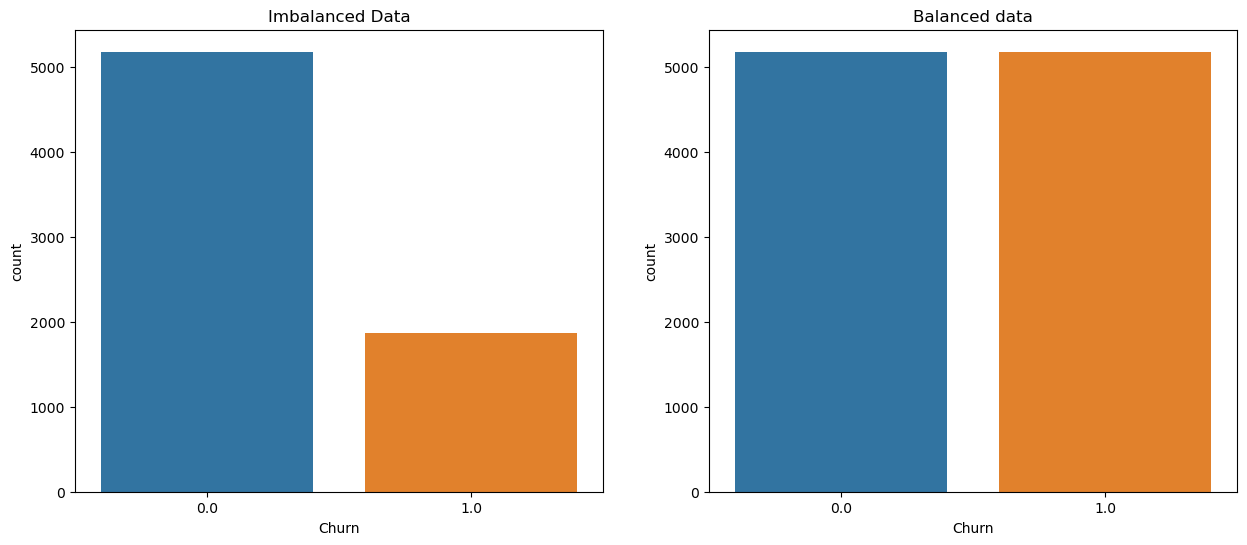

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df_churn['Churn'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Churn'])
plt.title("Balanced data")
plt.show()

Data has been balanced so now our model can predict every class with good accuracy.

In [37]:
#checking the shape of data before and after balancing
print(df_churn.shape)
print(x_new.shape)

(7043, 22)
(10348, 21)


## Checking skewness:

In [38]:
x_new.skew()

gender             -0.010957
SeniorCitizen       2.123260
Partner             0.236498
Dependents          1.106635
tenure              0.527973
PhoneService       -2.830101
MultipleLines       0.089625
InternetService     0.190949
OnlineSecurity      0.716056
OnlineBackup        0.358590
DeviceProtection    0.364693
TechSupport         0.698423
StreamingTV         0.072608
StreamingMovies     0.045974
Contract            1.098218
PaperlessBilling   -0.603808
PaymentMethod      -0.307239
MonthlyCharges     -0.406179
TotalCharges        1.135713
TenureCat           0.296735
MonthlyChargeCat   -0.408592
dtype: float64

Here, only one numerical column 'totalcharges' is skewed so we would use power transformation to remove the skewness while the other columns that are skewed are categorical, so we don't need to remove them.

In [39]:
#using log transform to remove skewness
x_new['TotalCharges']=np.log1p(x_new['TotalCharges'])

In [40]:
#checking skewness after removal
x_new.skew()

gender             -0.010957
SeniorCitizen       2.123260
Partner             0.236498
Dependents          1.106635
tenure              0.527973
PhoneService       -2.830101
MultipleLines       0.089625
InternetService     0.190949
OnlineSecurity      0.716056
OnlineBackup        0.358590
DeviceProtection    0.364693
TechSupport         0.698423
StreamingTV         0.072608
StreamingMovies     0.045974
Contract            1.098218
PaperlessBilling   -0.603808
PaymentMethod      -0.307239
MonthlyCharges     -0.406179
TotalCharges       -0.567203
TenureCat           0.296735
MonthlyChargeCat   -0.408592
dtype: float64

Now the skewness is removed from the dataset.

## Feature Scaling:

In [41]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

We are scaling the feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

## Training multiple models:

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [43]:
models_classification={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [44]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred_rfc = rfc.predict(x_test)
    acc=accuracy_score(y_test,pred_rfc)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8782608695652174 on Random_state  174


In [45]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=174)

## Finding the best model:

---------------------- LogisticRegression --------------------------
Accuracy_Score 0.7859903381642512
SCORE 0.7859903381642512
Confusion metrics
[[791 275]
 [168 836]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78      1066
         1.0       0.75      0.83      0.79      1004

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Cross_Val_Score 0.77271294914811
ROC AUC CURVE


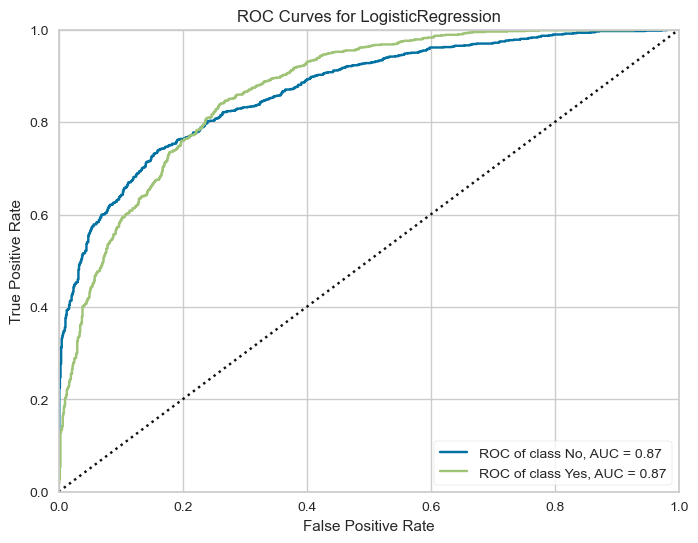

MODEL LEARNING CURVE


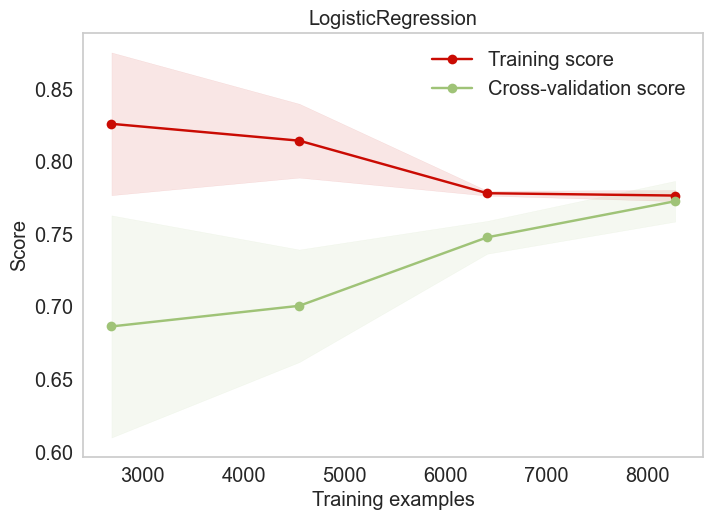

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.8260869565217391
SCORE 0.8260869565217391
Confusion metrics
[[872 194]
 [166 838]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1066
         1.0       0.81      0.83      0.82      1004

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Cross_Val_Score 0.7987195382492417
ROC AUC CURVE


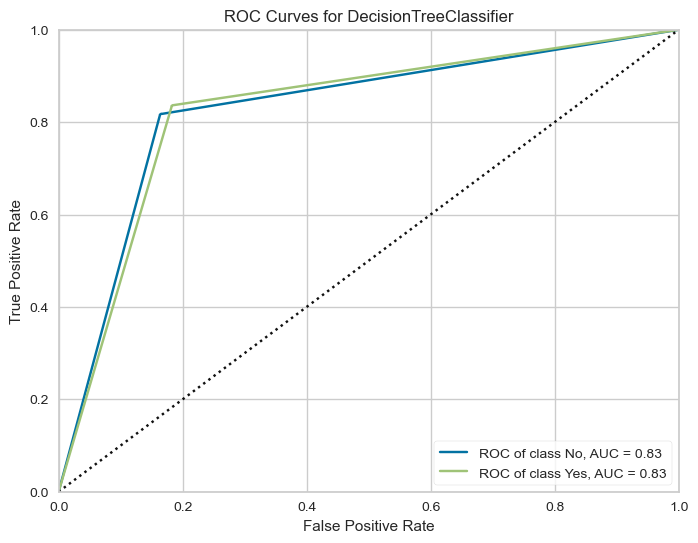

MODEL LEARNING CURVE


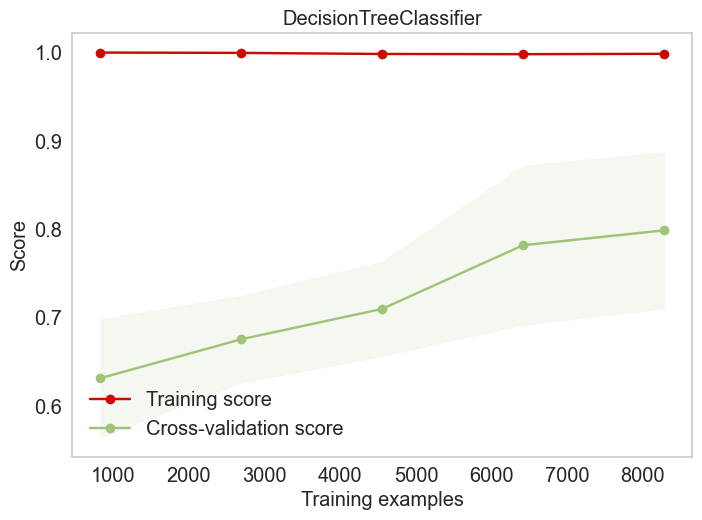

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.8806763285024155
SCORE 0.8806763285024155
Confusion metrics
[[944 122]
 [125 879]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1066
         1.0       0.88      0.88      0.88      1004

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Cross_Val_Score 0.8426920050527338
ROC AUC CURVE


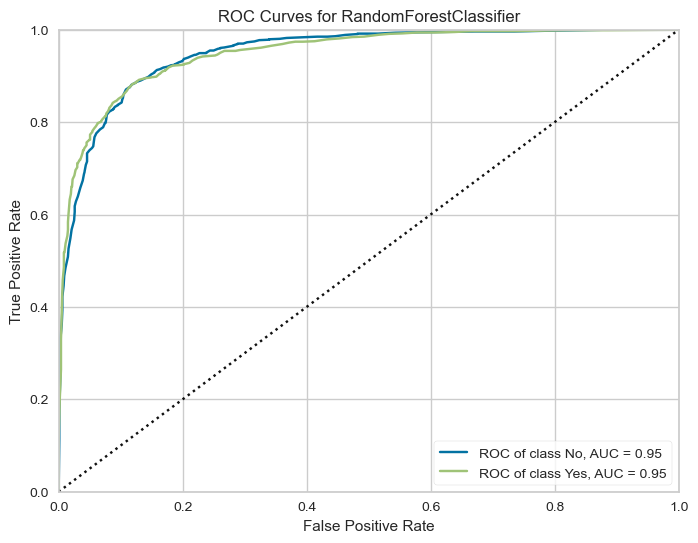

MODEL LEARNING CURVE


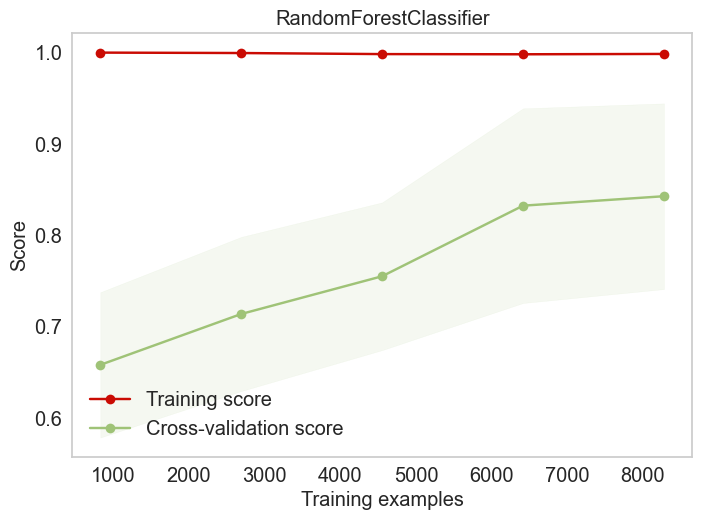

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.8681159420289855
SCORE 0.8681159420289855
Confusion metrics
[[902 164]
 [109 895]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1066
         1.0       0.85      0.89      0.87      1004

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

Cross_Val_Score 0.8312850615130649
ROC AUC CURVE


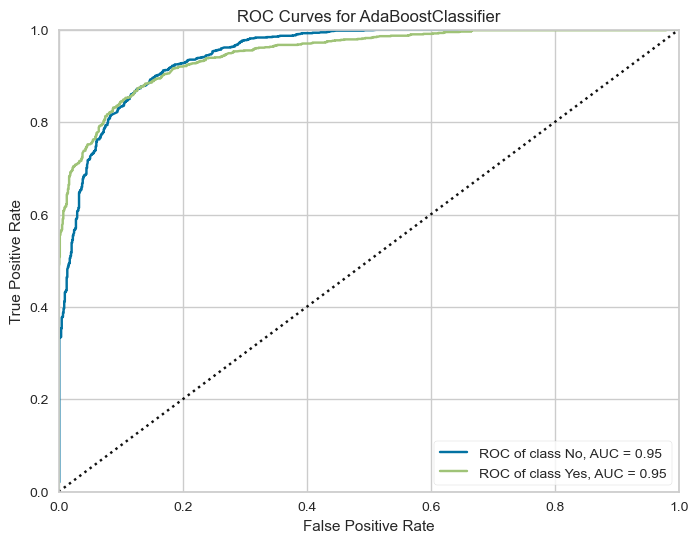

MODEL LEARNING CURVE


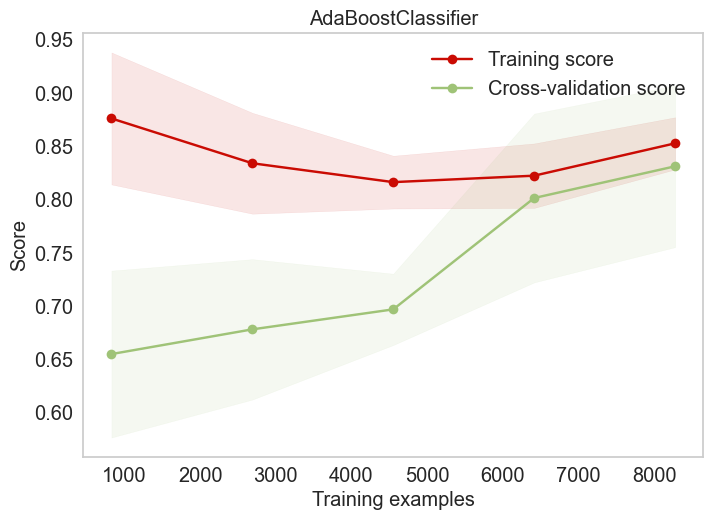

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.8734299516908213
SCORE 0.8734299516908213
Confusion metrics
[[917 149]
 [113 891]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      1066
         1.0       0.86      0.89      0.87      1004

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

Cross_Val_Score 0.8391151645057123
ROC AUC CURVE


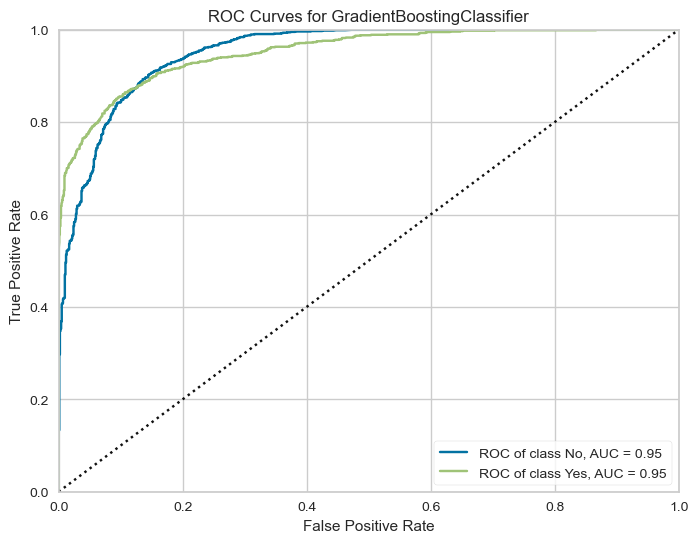

MODEL LEARNING CURVE


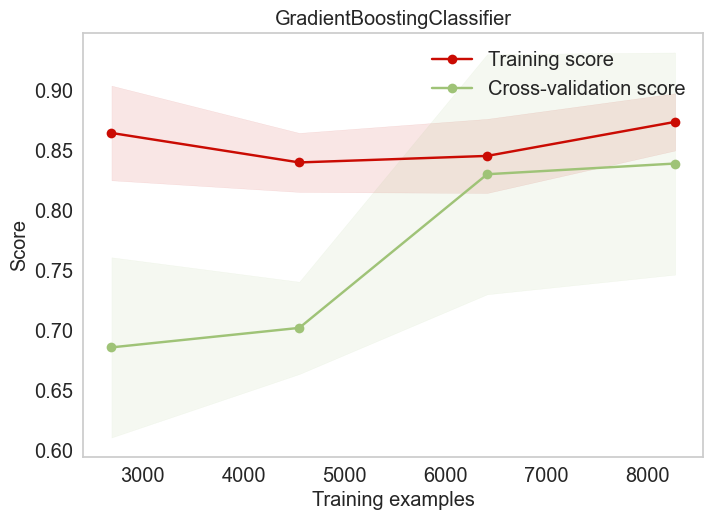

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8458937198067633
SCORE 0.8458937198067633
Confusion metrics
[[877 189]
 [130 874]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1066
         1.0       0.82      0.87      0.85      1004

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Cross_Val_Score 0.8213288876747384
ROC AUC CURVE


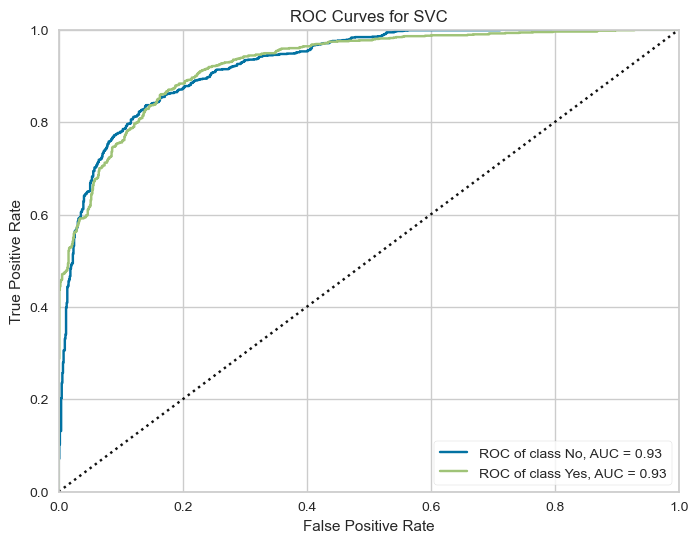

MODEL LEARNING CURVE


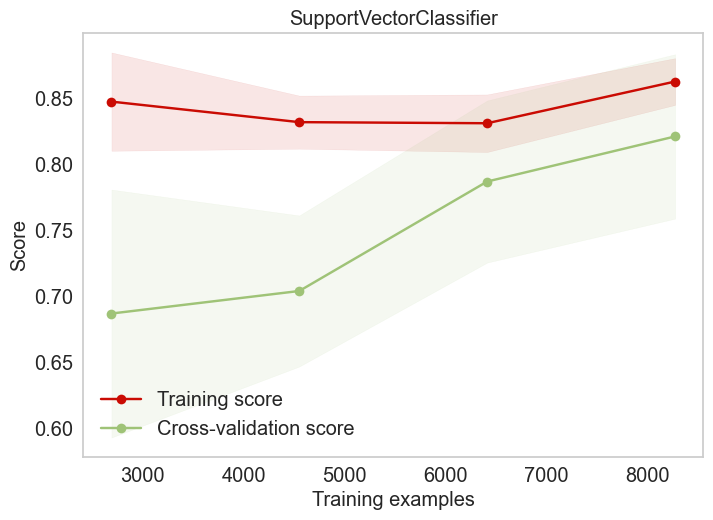

In [46]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(8,6))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [47]:
#making a dataframe of the models
models_df=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_df

,Models,Accuracy Score,Cross_val_score
0,LogisticRegression,0.785990,77.271295
1,DecisionTreeClassifier,0.826087,79.871954
2,RandomForestClassifier,0.880676,84.269201
3,AdaBoostClassifier,0.868116,83.128506
4,GradientBoostingClassifier,0.873430,83.911516
5,SupportVectorClassifier,0.845894,82.132889


## We are selecting RandomForestClassifier as our best model since it is giving good cross_val_score of 0.84 as compared to other models.

## Hyperparameter tuning our best ML model:

In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
param_class={
 'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]}

In [51]:
Grid_classifier=GridSearchCV(estimator=rfc,param_grid=param_class,cv=5)

In [52]:
Grid_classifier.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [53]:
Grid_classifier.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [54]:
Grid_classifier.best_score_

0.8449146008597118

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the score for it i.e., 84.49%

## Final Model Learning Curve:

In [55]:
rfcr=RandomForestClassifier(
bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'log2',
 max_samples= None,
 min_samples_leaf= 1,
 min_samples_split= 3)

## Cross Validation Score of Final Model:

In [56]:
new_cross_validation=cross_val_score(rfcr,x_new,y_new,cv=5).mean()
new_cross_validation

0.8429814865404417

In [57]:
rfcr.fit(x_train,y_train)
pred_rfcr=rfcr.predict(x_test)
print(accuracy_score(y_test,pred_rfcr))

0.8763285024154589


## ROC AUC Curve of Final ML Model:

ROC AUC CURVE


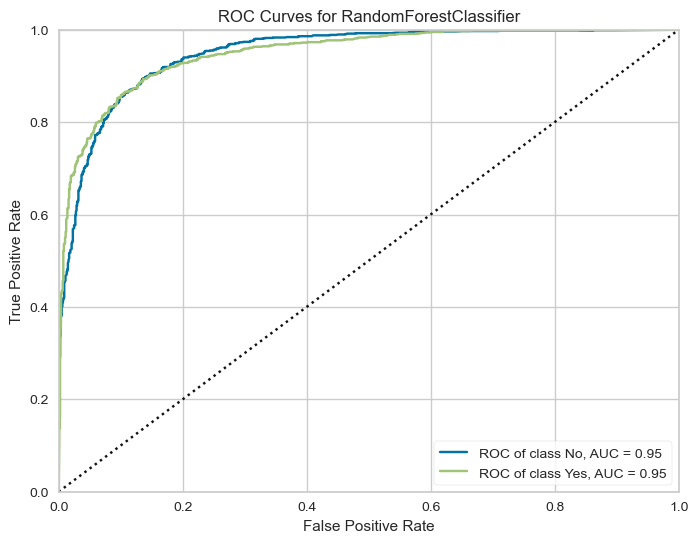

MODEL LEARNING CURVE


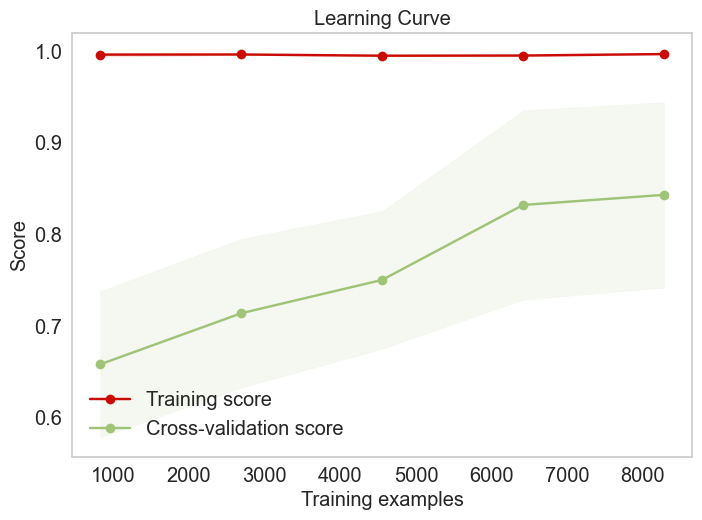

In [58]:
print("ROC AUC CURVE")
plt.figure(figsize=(8,6))
roc_auc(rfcr,x_train,y_train,X_test=x_test,y_test=y_test,classes=["No","Yes"],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(rfcr,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 95% for both Yes or No class.

## Final Model Metrics:

In [59]:
print("Confusion Matrix")
print(confusion_matrix(y_test,pred_rfcr))
print("Classification_Report")
print(classification_report(y_test,pred_rfcr))
print("Accuracy Score",accuracy_score(y_test,pred_rfcr))

Confusion Matrix
[[939 127]
 [129 875]]
Classification_Report
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1066
         1.0       0.87      0.87      0.87      1004

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Accuracy Score 0.8763285024154589


## The Accuracy score of final classification model is 87.63%

## Saving the model:

In [60]:
import joblib
joblib.dump(rfcr,"Customer_Churn_Analysis_Model.obj")

['Customer_Churn_Analysis_Model.obj']

## Loading the model:

In [61]:
model=joblib.load('Customer_Churn_Analysis_Model.obj')

In [62]:
model.predict(x_test)

array([0., 0., 1., ..., 0., 1., 1.])

## Conclusion

1. In this dataset, we were asked to predict the customer churn which is either Yes or No.
2. We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.
3. We selected those who have partner and who have dependents because they have less chance of leaving.
4. We found that churn is equal for both female and male as we cannot say that females are leaving more or males are.
5. We also seen that if people have online security and backup, and have techsupport they wouldn't leave.
6. In case of people using paperlessbilling and electroniccheck, they are found to have high chance at leaving and people who have contract month-to-month, they have a very high chance of leaving.
7. The data was found to be imbalanced so we used the balancing technique to balance the data by over-sampling the data.
8. We performed model buildling using many models and we found that RandomForestClassifier was giving good matrix so we selected RandomForestClassifier model and performed hyperparameter tuning to increase the accuracy.
9. The final model accuracy was found to be 87.63% and then we saved the final ML model.